## 0. Imports and Arguments


In [22]:
import sys
sys.path.append('../')
from scripts.visualization_utils import delayed_impact_bar_plot, immediate_impact_bar_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;

In [126]:
data_path = '../final_results/fico_data/syn_raw/0i/'
folders= ['dt','gnb','lgr','gbt']
#folders = ['dt','gnb','gbt']

## 1. Plotting Delayed and Immediate impact

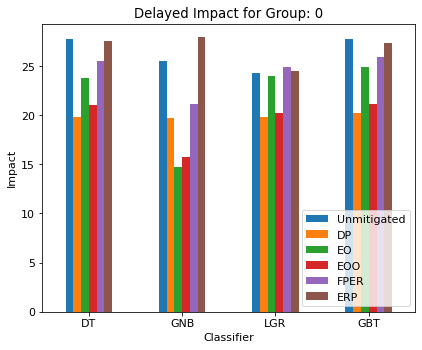

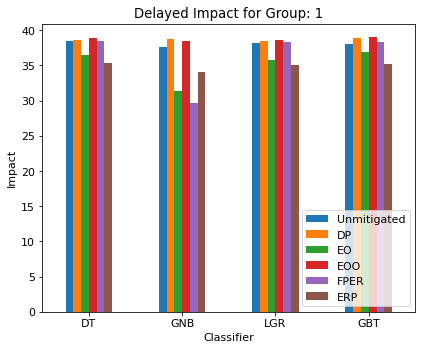

In [127]:
delayed_impact_bar_plot(data_path,0,['DT','GNB','LGR','GBT'])
delayed_impact_bar_plot(data_path,1,['DT','GNB','LGR','GBT'])

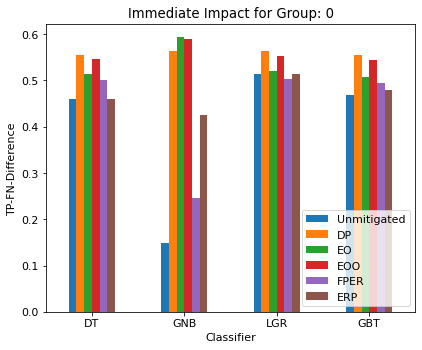

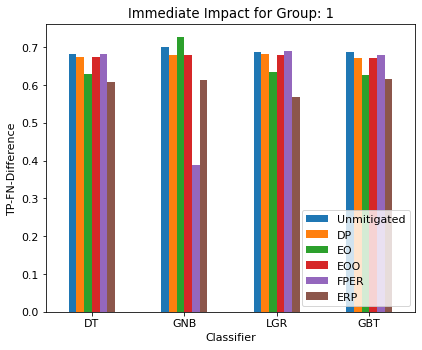

In [128]:
immediate_impact_bar_plot(data_path,0,['DT','GNB','LGR','GBT'])
immediate_impact_bar_plot(data_path,1,['DT','GNB','LGR','GBT'])

## 2. MWU p-test results (only fico_data)

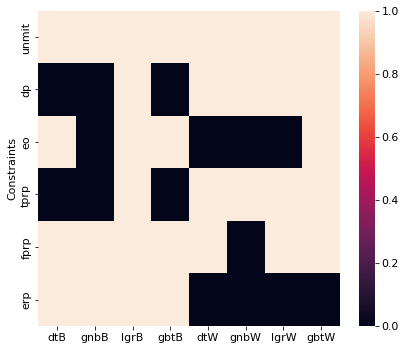

In [129]:
path_b = f'{data_path}mwu/p_un_vs_miti_B.csv'
df_b = pd.read_csv(path_b)
df_b = df_b.set_index('Constraints')
df_b[df_b >= 0.05] = 1
df_b[df_b < 0.05] = 0
path_w = f'{data_path}mwu/p_un_vs_miti_W.csv'
df_w = pd.read_csv(path_w)
df_w = df_w.set_index('Constraints')
df_w[df_w >= 0.05] = 1
df_w[df_w < 0.05] = 0
df = pd.concat([df_b,df_w], axis= 1)
sns.heatmap(df)
plt.savefig(f'{data_path}plot_un_vs_mit_sig.png',dpi=300)

## 3. Plotting: Delayed Impact over various DI distribution

In [136]:
# Absolute numbers

dataset_folder = ['std15_m75,-150', 'std15_m100,-100','std15_m150,-75']
parent_path = '../final_results/fico_data/DI_distributions/'

constraints = ['Unmitigated','DP','EO','EOO', 'FPER', 'ERP']
classifier = 'DT'

C:\Users\HaRi\AppData\Local\Temp\ipykernel_29728\2846990953.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(f'{parent_path}DI_setups_{m}.png',dpi=300)


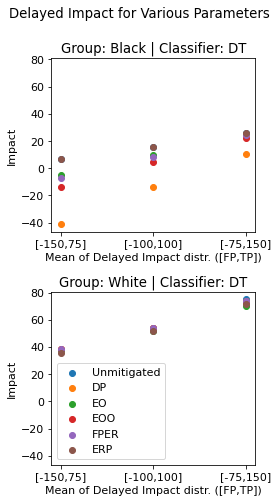

In [137]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(4,7),
                        constrained_layout=True,sharex=False, sharey=True)
fig.suptitle('Delayed Impact for Various Parameters')

m = classifier
for c in constraints:
    line = []
    for _,ds_f in enumerate(dataset_folder):
        path = f'{parent_path}{ds_f}/0_DI.csv'
        df = pd.read_csv(path)
        df = df.set_index('Constraint')
        line.append(df.loc[c,m])
    axs[0].set_title(f'Group: Black | Classifier: {m}')
    axs[0].scatter(['[-150,75]','[-100,100]','[-75,150]'],line,label = c)


for c in constraints:
    line = []
    for _,ds_f in enumerate(dataset_folder):
        path = f'{parent_path}{ds_f}/1_DI.csv'
        df = pd.read_csv(path)
        df = df.set_index('Constraint')
        line.append(df.loc[c,m])
    axs[1].set_title(f'Group: White | Classifier: {m}')
    axs[1].scatter(['[-150,75]','[-100,100]','[-75,150]'],line,label = c)
for ax in axs.flat:
    ax.set(xlabel='Mean of Delayed Impact distr. ([FP,TP])', ylabel='Impact')
    
plt.legend()
plt.savefig(f'{parent_path}DI_setups_{m}.png',dpi=300)
plt.show()


## 4. Plotting: Delayed and Immediate Impact over all SynSets

In [172]:
# Absolute numbers
dataset_folder = ['00', 'b0','i0', '0b','bb','ib','0i','bi','ii']
parent_path = '../final_results/fico_data/syn_raw/'
#parent_path = '../results/syn_raw/'

constraints = ['Unmitigated','DP','EO','EOO', 'FPER', 'ERP']
#classifier = ['DT','GNB','LGR','GBT']
classifier = 'DT'

C:\Users\HaRi\AppData\Local\Temp\ipykernel_29728\1652912136.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(f'{parent_path}DI_syn_{m}.png')


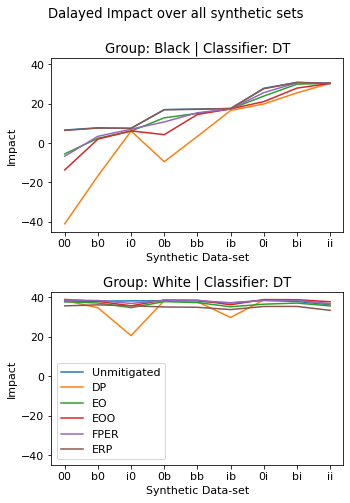

In [173]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,7),
                        constrained_layout=True,sharex=False, sharey=True)
fig.suptitle('Dalayed Impact over all synthetic sets')
m = classifier
for c in constraints:
    line = []
    for _,ds_f in enumerate(dataset_folder):
        path = f'{parent_path}{ds_f}/0_DI.csv'
        df = pd.read_csv(path)
        df = df.set_index('Constraint')
        line.append(df.loc[c,m])
    axs[0].set_title(f'Group: Black | Classifier: {m}')
    axs[0].plot(dataset_folder,line,label = c)


for c in constraints:
    line = []
    for _,ds_f in enumerate(dataset_folder):
        path = f'{parent_path}{ds_f}/1_DI.csv'
        df = pd.read_csv(path)
        df = df.set_index('Constraint')
        line.append(df.loc[c,m])
    axs[1].set_title(f'Group: White | Classifier: {m}')
    axs[1].plot(dataset_folder,line,label = c)
    
for ax in axs.flat:
    ax.set(xlabel='Synthetic Data-set', ylabel='Impact')
    
plt.legend()
plt.savefig(f'{parent_path}DI_syn_{m}.png')
plt.show()


C:\Users\HaRi\AppData\Local\Temp\ipykernel_29728\1574880615.py:29: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(f'{parent_path}I_syn_{m}.png')


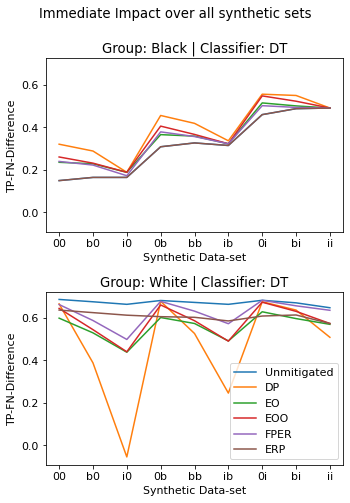

In [174]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,7),
                        constrained_layout=True,sharex=False, sharey=True)
fig.suptitle('Immediate Impact over all synthetic sets')
m = classifier
for c in constraints:
    line = []
    for _,ds_f in enumerate(dataset_folder):
        path = f'{parent_path}{ds_f}/0_I.csv'
        df = pd.read_csv(path)
        df = df.set_index('Constraint')
        line.append(df.loc[c,m])
    axs[0].set_title(f'Group: Black | Classifier: {m}')
    axs[0].plot(dataset_folder,line,label = c)

for c in constraints:
    line = []
    for _,ds_f in enumerate(dataset_folder):
        path = f'{parent_path}{ds_f}/1_I.csv'
        df = pd.read_csv(path)
        df = df.set_index('Constraint')
        line.append(df.loc[c,m])
    axs[1].set_title(f'Group: White | Classifier: {m}')
    axs[1].plot(dataset_folder,line,label = c)
        
for ax in axs.flat:
    ax.set(xlabel='Synthetic Data-set', ylabel='TP-FN-Difference')
    
plt.legend()
plt.savefig(f'{parent_path}I_syn_{m}.png')
plt.show()
